### Airbnb data test

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Google Sheets URL and sheet ID
sheet_id = "1ecopK6oyyb4d_7-QLrCr8YlgFrCetHU7-VQfnYej7JY"  # Replace with your actual sheet ID
excel_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=xlsx"

google_excel = pd.ExcelFile(excel_url)
Sheets = google_excel.sheet_names

df_list = []
for sheet in Sheets:
    sheet_ls = pd.read_excel(google_excel, sheet_name=sheet)
    sheet_ls['source_sheet'] = sheet
    df_list.append(sheet_ls)
    

display(df_list)


[      Unnamed: 0      realSum        room_type  room_shared  room_private  \
 0              0   194.033698     Private room        False          True   
 1              1   344.245776     Private room        False          True   
 2              2   264.101422     Private room        False          True   
 3              3   433.529398     Private room        False          True   
 4              4   485.552926     Private room        False          True   
 ...          ...          ...              ...          ...           ...   
 1098        1098  2486.115342  Entire home/apt        False         False   
 1099        1099   233.637194     Private room        False          True   
 1100        1100   317.062311     Private room        False          True   
 1101        1101  1812.855904  Entire home/apt        False         False   
 1102        1102   258.008577      Shared room         True         False   
 
       person_capacity  host_is_superhost  multi  biz  cleanli

In [3]:
combined_df = pd.concat(df_list, ignore_index = True)
display(combined_df.head())

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,source_sheet
0,0,194.033698,Private room,False,True,2,False,1,0,10,...,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam_weekdays
1,1,344.245776,Private room,False,True,4,False,0,0,8,...,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam_weekdays
2,2,264.101422,Private room,False,True,2,False,0,1,9,...,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam_weekdays
3,3,433.529398,Private room,False,True,4,False,0,1,9,...,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam_weekdays
4,4,485.552926,Private room,False,True,2,True,0,0,10,...,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam_weekdays


#### 1. Data Wrangling

In [5]:

combined_df = combined_df.drop(combined_df.columns[0], axis=1) # Dropping 1st row
combined_df = combined_df.rename(columns={'realSum': 'price'}) # rename realsum to price

# Disecting sheet name to extract city and day type
combined_df['city'] = combined_df['source_sheet'].str.split('_').str[0] 
combined_df['day_type'] = combined_df['source_sheet'].str.split('_').str[1]

#city to country mapping
city_country_mapping = {
    'amsterdam': 'Netherlands',
    'athens': 'Greece',
    'berlin': 'Germany',
    'barcelona': 'Spain',
    'budapest': 'Hungary',
    'lisbon': 'Portugal',
    'london': 'United Kingdom',
    'paris': 'France',
    'rome': 'Italy',
    'vienna': 'Austria'
}
combined_df['country'] = combined_df['city'].map(city_country_mapping)
combined_df['day_type'] = combined_df['day_type'].str.replace('weekdays', 'weekday').str.replace('weekends', 'weekend')
display(combined_df.head())

,price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,source_sheet,city,day_type,country
0,194.033698,Private room,False,True,2,False,1,0,10,93,...,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam_weekdays,amsterdam,weekday,Netherlands
1,344.245776,Private room,False,True,4,False,0,0,8,85,...,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam_weekdays,amsterdam,weekday,Netherlands
2,264.101422,Private room,False,True,2,False,0,1,9,87,...,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam_weekdays,amsterdam,weekday,Netherlands
3,433.529398,Private room,False,True,4,False,0,1,9,90,...,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam_weekdays,amsterdam,weekday,Netherlands
4,485.552926,Private room,False,True,2,True,0,0,10,98,...,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam_weekdays,amsterdam,weekday,Netherlands


In [6]:
# Drop duplicated column
combined_df = combined_df.drop(columns=['room_type'])
combined_df['room_private'] = combined_df['room_private'].astype(str)
combined_df['room_shared'] = combined_df['room_shared'].astype(str)

conds = [
    (combined_df['room_shared'] == 'True'),
    (combined_df['room_private'] == 'True') & (combined_df['room_shared'] == 'False'),
    (combined_df['room_shared'] == 'False') & (combined_df['room_private'] == 'False')
]

# Define the corresponding choices for each condition
choices = ['shared', 'private', 'entire apt']

# Create the new column using np.select, with the default set to 'Unknown' or leave as NaN
combined_df['room_type_c'] = np.select(conds, choices, default='Unknown')
combined_df = combined_df.drop(columns=['room_shared', 'room_private'])

# Display the updated DataFrame
display(combined_df.head())

,price,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,...,attr_index_norm,rest_index,rest_index_norm,lng,lat,source_sheet,city,day_type,country,room_type_c
0,194.033698,2,False,1,0,10,93,1,5.022964,2.539380,...,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam_weekdays,amsterdam,weekday,Netherlands,private
1,344.245776,4,False,0,0,8,85,1,0.488389,0.239404,...,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam_weekdays,amsterdam,weekday,Netherlands,private
2,264.101422,2,False,0,1,9,87,1,5.748312,3.651621,...,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam_weekdays,amsterdam,weekday,Netherlands,private
3,433.529398,4,False,0,1,9,90,2,0.384862,0.439876,...,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam_weekdays,amsterdam,weekday,Netherlands,private
4,485.552926,2,True,0,0,10,98,1,0.544738,0.318693,...,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam_weekdays,amsterdam,weekday,Netherlands,private


In [7]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price                       51707 non-null  float64
 1   person_capacity             51707 non-null  int64  
 2   host_is_superhost           51707 non-null  bool   
 3   multi                       51707 non-null  int64  
 4   biz                         51707 non-null  int64  
 5   cleanliness_rating          51707 non-null  int64  
 6   guest_satisfaction_overall  51707 non-null  int64  
 7   bedrooms                    51707 non-null  int64  
 8   dist                        51707 non-null  float64
 9   metro_dist                  51707 non-null  float64
 10  attr_index                  51707 non-null  float64
 11  attr_index_norm             51707 non-null  float64
 12  rest_index                  51707 non-null  float64
 13  rest_index_norm             517

##### Instead of dummy variables, create a column where one can know if the host of the listing has only one, two, four, and more than four listings.

In [9]:
combined_df['listings'] = combined_df.apply(lambda row: 'single' if row['multi'] == 0 and row['biz'] == 0 
    else 'two-four' if row['multi'] == 1 and row['biz'] == 0 
    else 'more than four' if row['multi'] == 0 and row['biz'] == 1 
    else 'unknown', axis=1)

combined_df = combined_df.drop(columns=['multi', 'biz'])

display(combined_df.head())

,price,person_capacity,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,source_sheet,city,day_type,country,room_type_c,listings
0,194.033698,2,False,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam_weekdays,amsterdam,weekday,Netherlands,private,two-four
1,344.245776,4,False,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam_weekdays,amsterdam,weekday,Netherlands,private,single
2,264.101422,2,False,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam_weekdays,amsterdam,weekday,Netherlands,private,more than four
3,433.529398,4,False,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam_weekdays,amsterdam,weekday,Netherlands,private,more than four
4,485.552926,2,True,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam_weekdays,amsterdam,weekday,Netherlands,private,single


#### 2. Exploratory questions (suggestions for beginners)rating.


How many listings are in each city in total and also per type of day?

In [12]:
# Total number of listings based on city
listings_city = combined_df.groupby('city').size().reset_index(name='total_listings')
display(listings_city)

# Total number of listings based on city and day type
listings_dt_city = combined_df.groupby(['city', 'day_type']).size().reset_index(name='listings_count')
display(listings_dt_city)


,city,total_listings
0,amsterdam,2080
1,athens,5280
2,barcelona,2833
3,berlin,2484
4,budapest,4022
5,lisbon,5763
6,london,9993
7,paris,6688
8,rome,9027
9,vienna,3537


,city,day_type,listings_count
0,amsterdam,weekday,1103
1,amsterdam,weekend,977
2,athens,weekday,2653
3,athens,weekend,2627
4,barcelona,weekday,1555
5,barcelona,weekend,1278
6,berlin,weekday,1284
7,berlin,weekend,1200
8,budapest,weekday,2074
9,budapest,weekend,1948


Which city has the biggest proportion of superhosts?

In [14]:
combined_df['host_is_superhost'] = combined_df['host_is_superhost'].astype(str)
no_of_superhosts = combined_df[combined_df['host_is_superhost'] == 'True'].groupby('city').size().reset_index(name='no_of_superhosts')
display(no_of_superhosts)

# Count total listings per city
total_lst_count = (combined_df.groupby('city').size().reset_index(name='total_lst_count'))
display(total_lst_count)

# Merge superhost and total counts, then calculate superhost proportion
per_city_shost = (no_of_superhosts.merge(total_lst_count, on='city').assign(superhost_proportion=lambda df: (df['no_of_superhosts'] / df['total_lst_count'] * 100).round(2)))
display(per_city_shost)


,city,no_of_superhosts
0,amsterdam,591
1,athens,2263
2,barcelona,514
3,berlin,639
4,budapest,1524
5,lisbon,1233
6,london,1573
7,paris,941
8,rome,2949
9,vienna,1005


,city,total_lst_count
0,amsterdam,2080
1,athens,5280
2,barcelona,2833
3,berlin,2484
4,budapest,4022
5,lisbon,5763
6,london,9993
7,paris,6688
8,rome,9027
9,vienna,3537


,city,no_of_superhosts,total_lst_count,superhost_proportion
0,amsterdam,591,2080,28.41
1,athens,2263,5280,42.86
2,barcelona,514,2833,18.14
3,berlin,639,2484,25.72
4,budapest,1524,4022,37.89
5,lisbon,1233,5763,21.40
6,london,1573,9993,15.74
7,paris,941,6688,14.07
8,rome,2949,9027,32.67
9,vienna,1005,3537,28.41


Which cities have listings with more than four rooms?

In [16]:
more_than_four_bedrooms = combined_df[combined_df['bedrooms'] > 4]
no_of_cities = more_than_four_bedrooms.groupby('city').size().reset_index(name='count')
display(no_of_cities)


,city,count
0,amsterdam,4
1,barcelona,2
2,berlin,2
3,lisbon,10
4,london,5
5,paris,2
6,rome,1


Are ratings typically high across listings, or is there a wide variation?
 How does person_capacity vary across listings? What is the most common capacity of listings


In [18]:
display(combined_df['guest_satisfaction_overall'].describe())
print('Yes there is a wide variation since the standard deviation is high')
print("------------------------------------------------------------------")
display(combined_df['person_capacity'].describe())
most_common_capacity = combined_df['person_capacity'].mode()[0]
print(f"Most common capacity of listings: {most_common_capacity}")

count    51707.000000
mean        92.628232
std          8.945531
min         20.000000
25%         90.000000
50%         95.000000
75%         99.000000
max        100.000000
Name: guest_satisfaction_overall, dtype: float64

Yes there is a wide variation since the standard deviation is high
------------------------------------------------------------------


count    51707.000000
mean         3.161661
std          1.298545
min          2.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: person_capacity, dtype: float64

Most common capacity of listings: 2


Plot the distribution of realSum for both weekday and weekend offers. Is it normally distributed, skewed, or multimodal? If skewed, consider using transformations (e.g., log transformation) to normalize it.

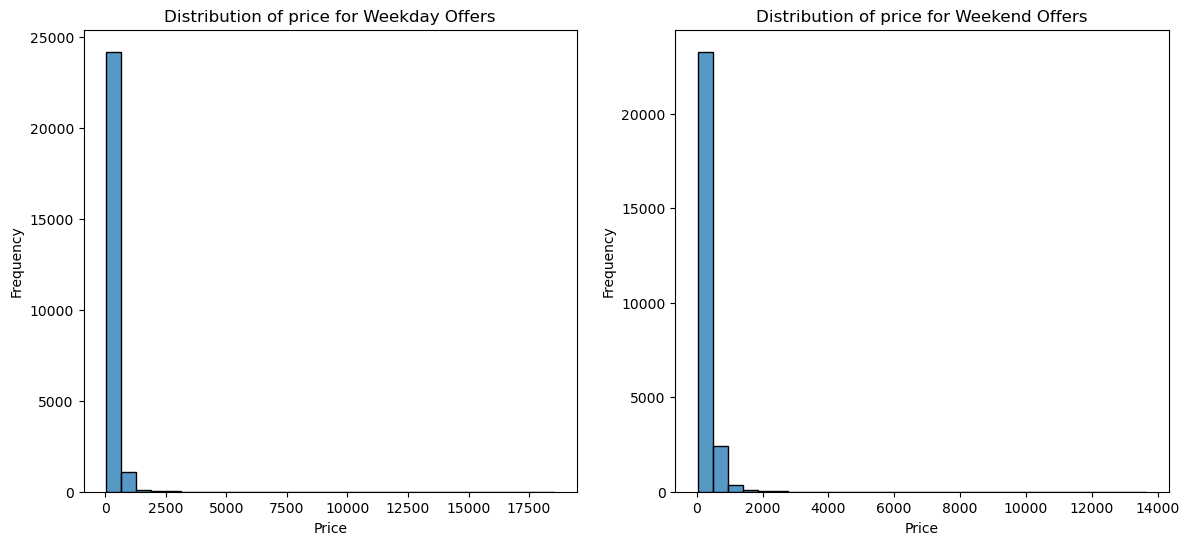

In [20]:
# Separate the data into weekday and weekend subsets
weekday = combined_df[combined_df['day_type'] == 'weekday']
weekend = combined_df[combined_df['day_type'] == 'weekend']

# Histogram for weekday data
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(weekday['price'], bins=30)
plt.title('Distribution of price for Weekday Offers')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Histogram for weekend data
plt.subplot(1, 2, 2)
sns.histplot(weekend['price'], bins=30)
plt.title('Distribution of price for Weekend Offers')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()



#####  As we look at the plots, they are skewed distributions. Hence to proceed further we use log tranfromations

C:\Users\ROG\AppData\Local\Temp\ipykernel_3836\2931727403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekday['log_Price'] = np.log(weekday['price'])
C:\Users\ROG\AppData\Local\Temp\ipykernel_3836\2931727403.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekend['log_Price'] = np.log(weekend['price'])


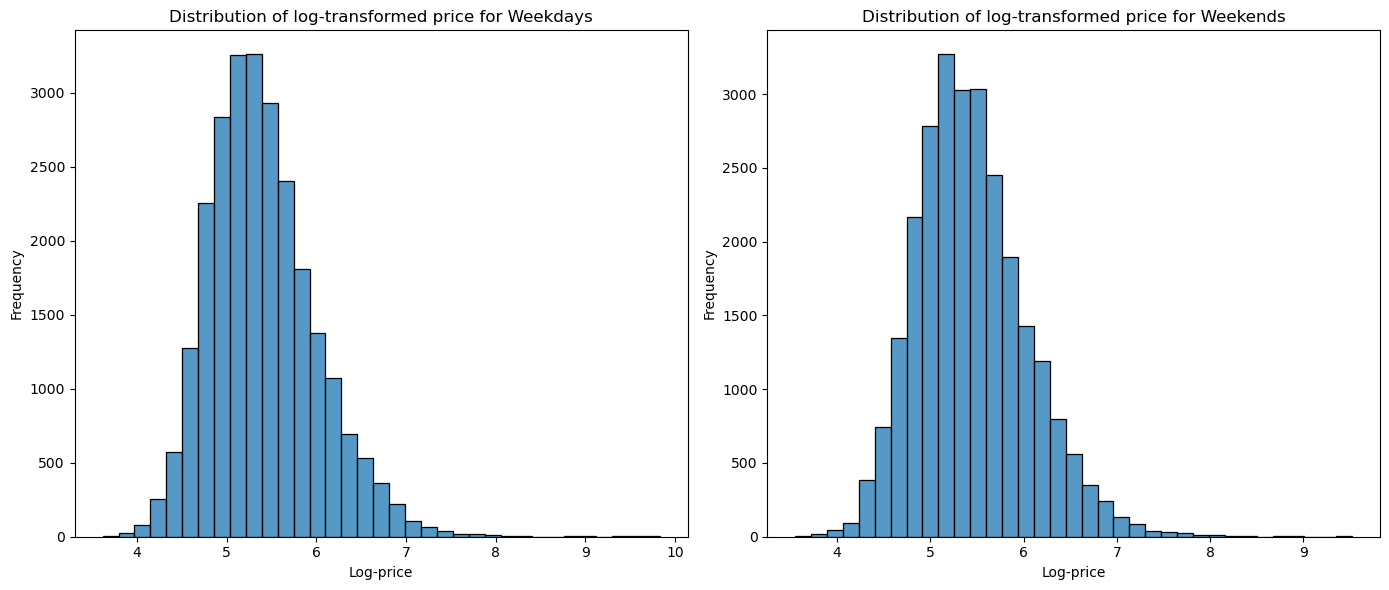

In [22]:
# Apply log transformation to 'price' column
weekday['log_Price'] = np.log(weekday['price'])
weekend['log_Price'] = np.log(weekend['price'])

# Plot histograms for the transformed data
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(weekday['log_Price'], bins=35)
plt.title('Distribution of log-transformed price for Weekdays')
plt.xlabel('Log-price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(weekend['log_Price'], bins=35)
plt.title('Distribution of log-transformed price for Weekends')
plt.xlabel('Log-price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Plot the distribution of guest_satisfaction_overall ratings and examine the distribution of cleanliness_rating.


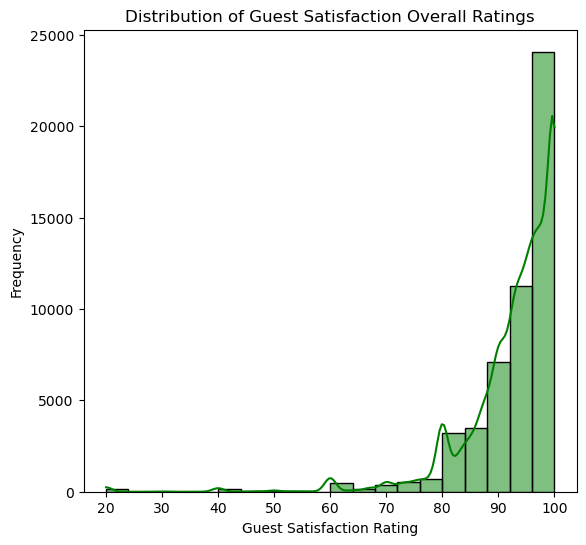

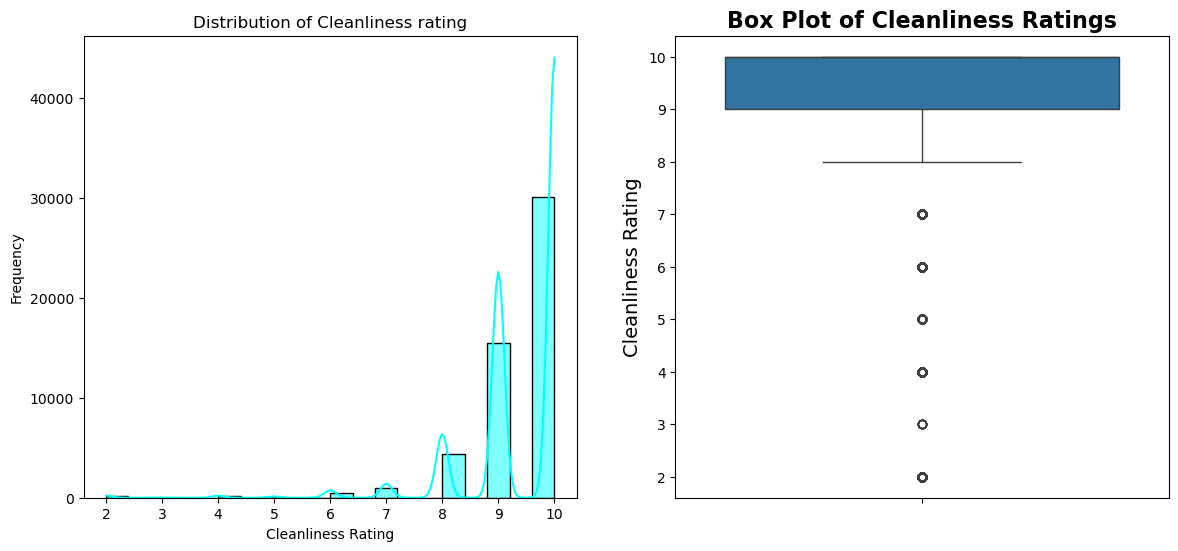

In [24]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(combined_df['guest_satisfaction_overall'], kde=True, color='green', bins=20)
plt.title('Distribution of Guest Satisfaction Overall Ratings')
plt.xlabel('Guest Satisfaction Rating')
plt.ylabel('Frequency')

cleanliness_ratings = combined_df['cleanliness_rating']

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(combined_df['cleanliness_rating'], kde=True, color='cyan', bins=20)
plt.title('Distribution of Cleanliness rating')
plt.xlabel('Cleanliness Rating')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(y=cleanliness_ratings)
plt.title("Box Plot of Cleanliness Ratings", fontsize=16, fontweight='bold')
plt.ylabel("Cleanliness Rating", fontsize=14)

plt.show()

Is there a difference in price between two cities? Choose at least three pairs of cities during weekdays.

In [26]:
from scipy.stats import ttest_ind
# List of pairs of cities to compare
city_group = [('rome', 'berlin'),('paris', 'london'),('amsterdam', 'budapest')]

# Conduct t test
for city_1,city_2 in city_group:
    price_city_1 = weekday[weekday['city'] == city_1]['price']
    price_city_2 = weekday[weekday['city'] == city_2]['price']
    
    t_stat, p_value = ttest_ind(price_city_1, price_city_2, equal_var=False)
    
    print(f"T-test between {city_1} and {city_2}:")
    print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
    if p_value < 0.05:
        print("Significant difference in prices")
    else:
        print("No significant difference in prices")
    print("-" * 40)

T-test between rome and berlin:
T-statistic: -5.7933, P-value: 0.0000
Significant difference in prices
----------------------------------------
T-test between paris and london:
T-statistic: 3.7436, P-value: 0.0002
Significant difference in prices
----------------------------------------
T-test between amsterdam and budapest:
T-statistic: 29.2915, P-value: 0.0000
Significant difference in prices
----------------------------------------


Does the price tend to be higher on weekends?


T-test Results
T-statistic: -2.8648, P-value: 0.0042
Significant difference in prices


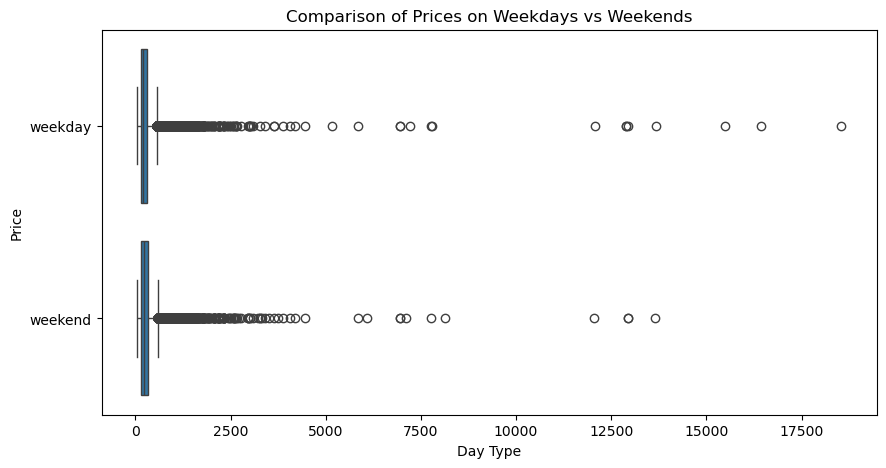

In [28]:
# perform t test
t_stat, p_value = ttest_ind(weekday['price'], weekend['price'], equal_var=False)
print("\nT-test Results")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Significant difference in prices")
else:
    print("No significant difference in prices")

                           
# Plot the data for better visualization
plt.figure(figsize=(10, 5))
sns.boxplot(x='price', y='day_type', data=combined_df)
plt.title('Comparison of Prices on Weekdays vs Weekends')
plt.xlabel('Day Type')
plt.ylabel('Price')
plt.show()

Are listings of superhosts more expensive than those of normal hosts?


T-test Results
T-statistic: -10.7877, P-value: 0.0000
Superhost listings are significantly more expensive


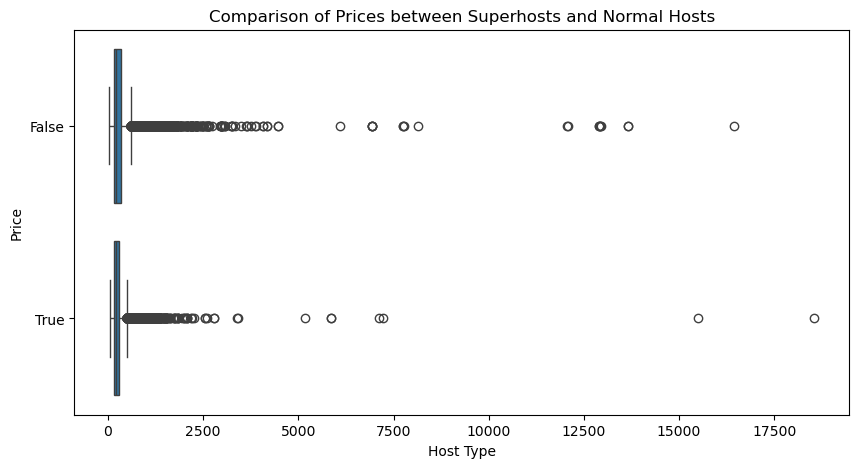

In [30]:
shost_prices = combined_df[combined_df['host_is_superhost'] == 'True']['price']
nhost_prices = combined_df[combined_df['host_is_superhost'] == 'False']['price']
# Perform t test 
t_stat, p_value = ttest_ind(shost_prices, nhost_prices, equal_var=False)
print("\nT-test Results")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Superhost listings are significantly more expensive")
else:
    print("No significant difference in price between superhost and normal host listings")

# Plot the data
plt.figure(figsize=(10, 5))
sns.boxplot(x='price', y='host_is_superhost', data=combined_df)
plt.title('Comparison of Prices between Superhosts and Normal Hosts')
plt.xlabel('Host Type')
plt.ylabel('Price')
plt.show()

Are superhosts closer to the city center and metro station than normal hosts?

In [32]:
s_host_df = combined_df[combined_df['host_is_superhost'] == 'True']
n_host_df = combined_df[combined_df['host_is_superhost'] == 'False']

# Perform t-tests for distances to the city center and metro station
t_stat_cityc, p_value_cityc = ttest_ind(s_host_df['dist'], n_host_df['dist'], equal_var=False)
t_stat_metro, p_value_metro = ttest_ind(s_host_df['metro_dist'], n_host_df['metro_dist'], equal_var=False)

# Display t-test results
print("\nT-test Results for Distance to City Center")
print(f"T-statistic: {t_stat_cityc:.2f}, P-value: {p_value_cityc:.4f}")
if p_value_cityc < 0.05:
    print("Superhosts are significantly closer to the city center")
else:
    print("No significant difference in distance to the city center")

print("\nT-test Results for Distance to Metro Station")
print(f"T-statistic: {t_stat_metro:.2f}, P-value: {p_value_metro:.4f}")
if p_value_metro < 0.05:
    print("Superhosts are significantly closer to metro stations")
else:
    print("No significant difference in distance to metro stations")


T-test Results for Distance to City Center
T-statistic: -13.00, P-value: 0.0000
Superhosts are significantly closer to the city center

T-test Results for Distance to Metro Station
T-statistic: -0.17, P-value: 0.8655
No significant difference in distance to metro stations


Are superhosts cleaner than normal hosts

In [34]:
shost_cleanliness = combined_df[combined_df['host_is_superhost'] == 'True']['cleanliness_rating']
nhost_cleanliness = combined_df[combined_df['host_is_superhost'] == 'False']['cleanliness_rating']

# Perform t-test for cleanliness ratings
t_stat_cleanliness, p_value_cleanliness = ttest_ind(shost_cleanliness, nhost_cleanliness, equal_var=False)

# Display t-test results
print("\nT-test Results for Cleanliness Rating")
print(f"T-statistic: {t_stat_cleanliness:.2f}, P-value: {p_value_cleanliness:.4f}")
if p_value_cleanliness < 0.05:
    print("Superhosts have significantly higher cleanliness ratings")
else:
    print("No significant difference in cleanliness ratings between superhosts and normal hosts.")


T-test Results for Cleanliness Rating
T-statistic: 92.22, P-value: 0.0000
Superhosts have significantly higher cleanliness ratings


Is there a pattern between room types and superhost status?

In [59]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(combined_df['room_type_c'], combined_df['host_is_superhost'])
# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared Statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")
if p < 0.05:
    print("There is a statistically significant association between room type and superhost status")
else:
    print("No significant association between room type and superhost status")

Chi-squared Statistic: 176.54
P-value: 0.0000
There is a statistically significant association between room type and superhost status
